In [2]:

import os
import csv
import pandas as pd
import hashlib
from io import BytesIO
import pickle, gzip
import random as rand
import numpy as np

import re
import numpy as np
import pandas as pd
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

WORKING_DIR = os.getcwd()
DATA_DIR = WORKING_DIR + '/../data'

import nltk
import csv
import string
from gensim.models import Phrases
from gensim.models import Word2Vec
from nltk.corpus import stopwords

import spacy
from nltk.corpus import stopwords


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt 
%matplotlib inline
# Save/Load Trained ML model
from sklearn.externals import joblib 
from datetime import datetime

In [6]:
from pyspark import SparkContext
from pyspark.sql import *
sc = SparkContext(master="local[3]")
sqlContext = SQLContext(sc)

In [1088]:
# [[x[0], x[1], x] for x in df['category']]
relatedDf = df[['asin', 'also_buy', 'also_view']]
f1 = relatedDf['also_buy'].isna()

nonullrel = relatedDf[~f1]
p = nonullrel['asin'].unique()
scr = []
# for x in p:
#     stm = "CREATE (:PRODUCT {" + "name:'{ax}'".format(ax=x) + "})"
# #     scr.append(stm)
#     print(stm)

#     break
# for x in nonullrel:
# scr

for x in nonullrel:
    for y in x['also_buy']:
        

CREATE (:PRODUCT {name:'0206323190'})
CREATE (:PRODUCT {name:'0829750487'})
CREATE (:PRODUCT {name:'0871167042'})
CREATE (:PRODUCT {name:'0982948530'})
CREATE (:PRODUCT {name:'1519588135'})
CREATE (:PRODUCT {name:'1579652956'})
CREATE (:PRODUCT {name:'1608322637'})
CREATE (:PRODUCT {name:'160832222X'})
CREATE (:PRODUCT {name:'1608322254'})
CREATE (:PRODUCT {name:'1936023857'})
CREATE (:PRODUCT {name:'399986236X'})
CREATE (:PRODUCT {name:'5120053017'})
CREATE (:PRODUCT {name:'5120053645'})
CREATE (:PRODUCT {name:'5120053084'})
CREATE (:PRODUCT {name:'5120053351'})
CREATE (:PRODUCT {name:'512005322X'})
CREATE (:PRODUCT {name:'5120053289'})
CREATE (:PRODUCT {name:'5120053890'})
CREATE (:PRODUCT {name:'5120053475'})
CREATE (:PRODUCT {name:'5449736762'})
CREATE (:PRODUCT {name:'5449756763'})
CREATE (:PRODUCT {name:'5449796765'})
CREATE (:PRODUCT {name:'5780122040'})
CREATE (:PRODUCT {name:'5780122199'})
CREATE (:PRODUCT {name:'5780125058'})
CREATE (:PRODUCT {name:'6030555170'})
CREATE (:PRO

[]

In [1032]:
def data_preprocessing(dataframe):
    dataframe['item_id'] = dataframe['asin'].factorize()[0]
    cat = pd.DataFrame(dataframe['category'].values)
    products_df = dataframe[['item_id', 'asin', 'brand', 'date', 'price', 'rank']]
    related_df = dataframe[['item_id', 'asin','also_buy', 'also_view']]
    category_df = dataframe[['item_id', 'asin']]
    category_df['category1'] = cat
#     category_to_id = dict(category_id_df.values)
#     id_to_category = dict(category_id_df[['category_id', 'item_id']].values)
#     dataframe["textlength"] = dataframe['reviewText'].str.len()
#     dummies = pd.get_dummies(dataframe['categoryID']).rename(columns=lambda x: 'categoryID_'+str(x))
#     dataframe = pd.concat([dataframe, dummies], axis=1)
#     helpful = pd.DataFrame.from_dict(dict(dataframe['helpful'])).T
#     dataframe = pd.concat([dataframe, helpful], axis=1)
#     dataframe['reviewTime'] = pd.to_datetime(dataframe['reviewTime'])
    
#     dataframe['helpful_rate'] = dataframe['nHelpful']/dataframe['outOf']
#     dataframe['outOf'] = dataframe['outOf']
#     dataframe['helpful_rate'].fillna(0, inplace=True)
#     user_helpful = dataframe.groupby(['reviewerID'])['helpful_rate'].mean()
#     categoryPriceMeans = dataframe.groupby(['categoryID'])['price'].mean()
#     dataframe['user_helpful'] = user_helpful
#     dataframe['user_helpful'].fillna(user_helpful, inplace=True)
#     dataframe['price'] = dataframe.groupby(['categoryID'])['price'].mean()
#     dataframe['price'].fillna(categoryPriceMeans, inplace=True)
  
    return products_df, related_df, category_df

products, related, category = data_preprocessing(df)
products
category
# (products['asin'].value_counts() == 1).sum()

/Users/justin.shamoun/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,item_id,asin,category1
0,0,0000037214,"[Clothing, Shoes & Jewelry, Costumes & Accesso..."
1,1,0201377179,"[Clothing, Shoes & Jewelry, Luggage & Travel G..."
2,2,0204444454,"[Clothing, Shoes & Jewelry, Luggage & Travel G..."
3,3,0204444403,"[Clothing, Shoes & Jewelry, Luggage & Travel G..."
4,4,0206313535,"[Clothing, Shoes & Jewelry, Novelty & More, Cl..."
5,5,0206335962,"[Clothing, Shoes & Jewelry, Women, Clothing, S..."
6,6,0206323190,"[Clothing, Shoes & Jewelry, Women, Shoes, Sand..."
7,7,0244444404,"[Clothing, Shoes & Jewelry, Luggage & Travel G..."
8,8,024444448X,"[Clothing, Shoes & Jewelry, Luggage & Travel G..."
9,9,0681256036,"[Clothing, Shoes & Jewelry, Novelty & More, Cl..."


In [995]:
# DATA_DIR = './dataa/landingZone/'
# FILE_NAME = 'meta_Clothing_Shoes_and_Jewelry.json.gz'
PATH = '/Users/justin.shamoun/js/dse260-CapStone-Amazon/src/data/data-lake-landing-zone/meta_Clothing_Shoes_and_Jewelry.json.gz'
from collections import defaultdict
categoryDict = defaultdict(list)
scategoryDict = defaultdict(list)
scategory2Dict = defaultdict(list)
itemDict = defaultdict(list)

dd = []
i = 0

def readGz(f):
    for l in gzip.open(f):
        yield eval(l)

CATEGORY_IDX = {
    "Clothing, Shoes & Jewelry":{
        "Men": {
            "Clothing": {},
            "Shoes": {},
            "Jewelry": {},
            "Watches": {},
            "Accessories": {}
        },
        "Women": {
            "Clothing": {},
            "Shoes": {},
            "Jewelry": {},
            "Watches": {},
            "Handbags & Wallets": {},
            "Accessories": {}
        },
        "Girls": {},
        "Boys": {},
        "Baby": {},
        "Luggage & Travel Gear": {},
        "Costumes & Accessories": {}
    }
}

#             CLOTHING, SHOES, JEWELRY & WATCHES
# Amazon Fashion
# Women
# Men
# Girls
# Boys
# Baby
# Luggage
# The Drop
# Prime Wardrobe
# Sales & Deals
#             Clothing
# Shirts
# Fashion Hoodies & Sweatshirts
# Sweaters
# Jackets & Coats
# Jeans
# Pants
# Shorts
# Active
# Swim
# Suits & Sport Coats
# Underwear
# Socks
# Sleep & Lounge
# T-Shirts & Tanks
# Shoes
# Jewelry
# Watches
# Accessories"
#         }
#                     }
# }

def getSampleFileName(cat, subcat, subcat2, image):
    return os.path.join(cat, subcat, subcat2), "{}.pkl".format(str(image))

products = []
related = []
category = []

for l in readGz(PATH):
    products.append(l)
#     related = related.append([l['asin'], l['also_buy'], l['also_view']])
#     category = category.append([l['asin'], l['category']])
#     category,item, also_bought = l['category'], l['asin'], l['also_buy']
#     cat = category[0]
#     scat = category[1]
#     try:
#         scat2 = category[2]
#     except:
#         scat2 = ""

    
#     catId = str(int(hashlib.sha256(cat.encode('utf-8')).hexdigest(), 16) % 10**9)
#     scatId = str(int(hashlib.sha256(scat.encode('utf-8')).hexdigest(), 16) % 10**9)
#     scatId2 = str(int(hashlib.sha256(scat2.encode('utf-8')).hexdigest(), 16) % 10**9)
                        
#     categoryDict[cat] = catId
#     scategoryDict[scat] = scatId
#     scategory2Dict[scat2] = scatId2

#     p, fn = getSampleFileName(cat, scat, scat2, item)
#     itemDict[p].append(fn)
# #     print(l)
#     dd.append(l)   
#     dd.append([cid, scid, scatId2, item, fn])   
    if i > 5000:
        break
    i+=1
    
# rdd = sc.parallelize(dd)
df = pd.DataFrame(products)
df.head()

,also_buy,also_view,asin,brand,category,date,description,details,feature,fit,image,main_cat,price,rank,similar_item,tech1,title
0,NaN,NaN,0000037214,Big Dreams,"[Clothing, Shoes & Jewelry, Costumes & Accesso...",5 star5 star (0%),"[6"" long, stretched waist measures 11 1/2"" acr...",NaN,"[3 layers of tulle, 6"" long, stretched waist m...",NaN,NaN,NaN,NaN,"19,963,069inClothing,ShoesJewelry(",NaN,NaN,Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...
1,NaN,NaN,0201377179,Anello,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",5 star,[The Hottest Bag in Town! Brand: Anello Condit...,NaN,"[Polyester Canvas Waterproof, Imported, Size: ...",NaN,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,"4,537,420inClothing,ShoesJewelry(",NaN,NaN,Japan Anello Backpack Unisex LARGE LIGHT GRAY ...
2,NaN,"[B07CJF5HLR, B01EBI8UH6, B01N1LR908, B074M4QKG...",0204444454,Anello,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",5 star,[The Hottest Bag in Town! Brand: Anello Condit...,NaN,"[PU Leather, Imported, Size: Large PU Leather ...",NaN,[https://images-na.ssl-images-amazon.com/image...,NaN,$70.00,"3,994,472inClothing,ShoesJewelry(",NaN,NaN,Japan Anello Backpack Unisex PINK BEIGE LARGE ...
3,NaN,"[B01DLVYOPG, B07CJF5HLR, B01MSS59Y6, B071YBC1J...",0204444403,Anello,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",5 star,[The Hottest Bag in Town! Brand: Anello Condit...,NaN,"[PU Leather, Imported, Size: Large PU Leather ...",NaN,[https://images-na.ssl-images-amazon.com/image...,NaN,$65.99,"635,761inClothing,ShoesJewelry(",NaN,NaN,Japan Anello Backpack Unisex BLACK LARGE PU LE...
4,NaN,"[B00VGT93YS, B07FTY87LM, B01IKVOY8E, B01GF6C6F...",0206313535,bettyhome,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...",5 star5 star (0%),[Brand New. Hat Centre Length: adult about 8c...,NaN,"[Imported, Plush,Cotton, Polyester, Lovely for...",NaN,[https://images-na.ssl-images-amazon.com/image...,NaN,$18.99,"5,061,041inClothing,ShoesJewelry(",NaN,NaN,bettyhome Unisex Adult Winter Spring Thicken C...


In [989]:
# df['cat1'] = 
# pd.DataFrame(df['category'].values.list())
cat = pd.DataFrame([a for a in df['category']])
cat.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,5002,5002,4933,4693,3909,2862,2441,1976,1617,1038,575,288,130,21,2
unique,1,11,60,208,660,1074,1152,1063,903,605,341,183,76,15,1
top,"Clothing, Shoes & Jewelry",Women,Clothing,Wrist Watches,Pendants,Mineral crystal,Imported,Hand Wash,Water resistant to 99 feet (30 M): withstands ...,Marked 925,"Machine wash warm, tumble dry low",Amber lens provides high definition contrast a...,Imported,Printed in the USA,Portugal
freq,5002,2345,1182,711,270,123,94,35,117,60,24,13,6,2,2


In [944]:
df.columns = ['cat1', 'cat2', 'cat3', 'item', 'fn']
# df
dfprocessed = df.groupby(['cat2', 'cat3'])['item'].count().sort_values(ascending=False)
dfprocessed

cat2                               cat3                                                                               
Women                              Jewelry                                                                                917
                                   Clothing                                                                               497
Men                                Clothing                                                                               456
Women                              Watches                                                                                392
Men                                Watches                                                                                373
                                   Shoes                                                                                  294
Women                              Shoes                                                                                  257

In [842]:
DATA_DIR = ROOT_DATA_DIR + 'data-lake-landing-zone/'
ROOT_DATA_DIR = '/Users/justin.shamoun/js/dse260-CapStone-Amazon/src/notebooks/../data/'

CATEGORY_IDX = {
                    "Clothing, Shoes & Jewelry":{
                        "i":-1,
                        "r":[-1,-1],
                        "Costumes & Accessories":{
                            "i":-1,
                            "r":[-1,-1]
                        }
                    }
}

with open(AMAZON_INDEX, 'w') as idxfile:
        
        try:
           
            csvwriter = csv.writer(idxfile)
            i= 0
            for category in itemDict:
                
                c = x.split('/')
                cid = c[0]
                scid = c[1]                
                for f in itemDict[category]:
                    csvwriter.writerow([cid, scid, f])
#                                 i= i+1
                
#                     CATEGORY_IDX[category]["r"][1] = i-1                    
#                 CATEGORY_IDX[category]["r"][1] = i-1
                
        except csv.Error as e:
            print(e)

        finally:
            idxfile.close()
                
pd.read_csv(AMAZON_INDEX)

,318263107,291687302,0000037214.pkl
0,318263107,291687302,6042651552.pkl
1,318263107,291687302,6042651528.pkl
2,318263107,291687302,6042648608.pkl
3,318263107,291687302,0201377179.pkl
4,318263107,291687302,0204444454.pkl
5,318263107,291687302,0204444403.pkl
6,318263107,291687302,0244444404.pkl
7,318263107,291687302,024444448X.pkl
8,318263107,291687302,0982948530.pkl
9,318263107,291687302,1936023857.pkl


In [836]:
WORKING_DIR = os.getcwd()
ROOT_DATA_DIR = WORKING_DIR+'/../data'
DATA_DIR = ROOT_DATA_DIR+'/data-lake-landing-zone'

AMAZON_INDEX = DATA_DIR+'/amozon-index.csv'
# DOWNLOAD_S3URI = "s3://reinvent2018-sagemaker-pytorch"

WEIGHT_SAME_IMG = 0.0
WEIGHT_DIFF_IMG = 1.0
PARAM_SAME_CATEGORY_WEIGHTING = 0.05
PARAM_SAME_SUBCATEGORY_WEIGHTING = 0.01   

AMAZON_INDEX = DATA_DIR+'/amazon-index.csv'
AMAZON_INDEX_TRAIN = DATA_DIR+'/amazon-index-train.csv'
AMAZON_INDEX_TEST = DATA_DIR+'/amazon-index-test.csv'
# 
AMAZON_TUPLES_INDEX_TRAIN = DATA_DIR+'/amazon-tuples-index-train.csv'
AMAZON_TUPLES_INDEX_TEST = DATA_DIR+'/amazon-tuples-index-test.csv'

In [909]:
TRAIN_IMG_PATHS = ["Clothing/women/"]

TEST_IMG_PATHS = ["Clothing/men/"]

def getImageTensor(img_path, transform):
    
    image = Image.open(img_path)
    image_tensor = transform(image)
        
    return image_tensor

def get_categories(img_loc) :

    path, file = os.path.split(img_loc)
    path_parts = path.split(os.sep)
    print(path_parts)
    category = path_parts[0]
    subcategory = path_parts[1]

    return {'category': category, 'sub': subcategory}
    
def generate_sample_index(idxFile, img_paths) :    
    
    with open(idxFile, 'w') as csvfile:

        try:

            csvwriter = csv.writer(csvfile)

            for paths in itemDict:
                
                c = paths
                cid = c.split('/')[0]
                scid = c.split('/')[1]
                    
                files = itemDict[paths]
                row = []
                for f in files:
                    csvwriter.writerow([os.path.join(paths,f),cid,scid])
            

        except csv.Error as e:
            print(e)

        finally:
            csvfile.close()

In [910]:
# DATA_DIR = DATA_DIR = 
DATA_DIR = '/Users/justin.shamoun/js/dse260-CapStone-Amazon/src/notebooks/../data/data-lake-landing-zone'
AMAZON_PARTIAL_INDEX = DATA_DIR+'/amazon-partial-index.csv'
AMAZON_PARTIAL_INDEX_TRAIN = DATA_DIR+'/amazon-partial-index-train.csv'
AMAZON_PARTIAL_INDEX_TEST = DATA_DIR+'/amazon-partial-index-test.csv'

generate_sample_index(AMAZON_PARTIAL_INDEX_TRAIN, TRAIN_IMG_PATHS)
generate_sample_index(AMAZON_PARTIAL_INDEX_TEST, TEST_IMG_PATHS)
generate_sample_index(AMAZON_PARTIAL_INDEX, TRAIN_IMG_PATHS+TEST_IMG_PATHS)

In [915]:
def generate_tuples_sample_index(idxFile, tuplesIdxFile) :
    indexDF = pd.read_csv(idxFile, header=None, names=[ 'img1', 'cat','sub_cat'])
    tuplesDF = None
    for (idx, row) in indexDF.iterrows():

        df = (indexDF[idx:]).copy().reset_index(drop=True)

        sim_cat_weight = WEIGHT_DIFF_IMG-(((row['cat'] == df['cat']) * PARAM_SAME_CATEGORY_WEIGHTING) + ((row['sub_cat'] == df['sub_cat']) * PARAM_SAME_SUBCATEGORY_WEIGHTING))

        sim_cat_weight[0] = WEIGHT_SAME_IMG

        df['img2'] = pd.Series((row['img1'] for x in range(idx, indexDF.shape[0])))
        df['label'] = sim_cat_weight   
        
        df= df.drop(columns= ['cat','sub_cat']) 
        tuplesDF = df if (tuplesDF is None) else tuplesDF.append(df)
        
    tuplesDF.to_csv(tuplesIdxFile, sep=',', index=False, header=None)
    
    return tuplesDF.reset_index(drop=True)

In [918]:
AMAZON_TUPLES_PARTIAL_INDEX_TRAIN = DATA_DIR+'amazon-partial-tuples-index-train.csv'
AMAZON_TUPLES_PARTIAL_INDEX_TEST = DATA_DIR+'amazon-partial-tuples-index-test.csv'
t = generate_tuples_sample_index(AMAZON_PARTIAL_INDEX_TRAIN, AMAZON_TUPLES_PARTIAL_INDEX_TRAIN)
generate_tuples_sample_index(AMAZON_PARTIAL_INDEX_TEST, AMAZON_TUPLES_PARTIAL_INDEX_TEST)

,img1,img2,label
0,318263107/291687302/0000037214.pkl,318263107/291687302/0000037214.pkl,0.00
1,318263107/291687302/6042651552.pkl,318263107/291687302/0000037214.pkl,0.94
2,318263107/291687302/6042651528.pkl,318263107/291687302/0000037214.pkl,0.94
3,318263107/291687302/6042648608.pkl,318263107/291687302/0000037214.pkl,0.94
4,318263107/182804944/0201377179.pkl,318263107/291687302/0000037214.pkl,0.95
5,318263107/182804944/0204444454.pkl,318263107/291687302/0000037214.pkl,0.95
6,318263107/182804944/0204444403.pkl,318263107/291687302/0000037214.pkl,0.95
7,318263107/182804944/0244444404.pkl,318263107/291687302/0000037214.pkl,0.95
8,318263107/182804944/024444448X.pkl,318263107/291687302/0000037214.pkl,0.95
9,318263107/182804944/0982948530.pkl,318263107/291687302/0000037214.pkl,0.95


In [924]:
# import json
!conda install pytorch torchvision -c pytorch
y
# DATA_DIR
# AMAZON_PARTIAL_INDEX

^C

CondaError: KeyboardInterrupt



'0000037214.pkl'

In [576]:
# # Build the bigram and trigram models
# bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# # Faster way to get a sentence clubbed as a trigram/bigram
# bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

# # See trigram example
# print(trigram_mod[bigram_mod[data_words[0]]])



In [260]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [577]:
# stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# data_words_nostops = remove_stopwords(data_words)

# # Form Bigrams
# data_words_bigrams = make_bigrams(data_words_nostops)

# # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# # python3 -m spacy download en
# nlp = spacy.load('en', disable=['parser', 'ner'])

# # Do lemmatization keeping only noun, adj, vb, adv
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# print(data_lemmatized[:1])

In [578]:
# # Create Dictionary
# id2word = corpora.Dictionary(data_lemmatized)

# # Create Corpus
# texts = data_lemmatized

# # Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in texts]

# # View
# print(corpus[:1])

In [579]:
# id2word[0]
# [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]


In [580]:
# Build LDA model

# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=20)

# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=20, 
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha='auto',
#                                            per_word_topics=True)

In [581]:

# Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

# pprint(list(id2word))
# Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]
# id2wrd
# list(doc_lda)

In [582]:
# Compute Perplexity
# print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# # Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\nCoherence Score: ', coherence_lda)

In [583]:
df['content'] = df.apply(lambda x: ''.join(str(x)), axis=1)
data = df.content.values.tolist()
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# df['content'] = df[names].apply(lambda x: ' '.join(x), axis=1)
# data = df.content.values.tolist()

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []    
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

data = [re.sub('\S*@\S*\s?', '', sent) for sent in data] # Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data] # Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data] 
data = [s.replace('\\n', '') for s in data]
data = [x.lower() for x in data]
data_words = list(sent_to_words(data))

data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
data_vectorized = vectorizer.fit_transform(data_lemmatized)
# # print(data_words)
# print(data_lemmatized)
# print(data_vectorized)

In [535]:
# %%time
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
# from sklearn.model_selection import GridSearchCV
    
# vectorizer = CountVectorizer(analyzer='word',
#                              min_df=3,
#                              stop_words='english',
#                              lowercase=True,
#                              token_pattern='[a-zA-Z0-9]{3,}')


# data_vectorized = vectorizer.fit_transform(data_lemmatized)
# # print(data_vectorized)

In [584]:
type(data_vectorized)
data_vectorized.todense()
data_dense = data_vectorized.todense()
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.9150942397315979 %


In [585]:
%%time
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
num_of_topic = 10
lda_model = LatentDirichletAllocation(n_components=num_of_topic,
                                     max_iter=10,
                                     learning_method='online',
                                     random_state=100,
                                     batch_size=128,
                                      evaluate_every = -1,
                                      n_jobs = -1)
lda_output = lda_model.fit_transform(data_vectorized) 
print(lda_model)
print("Log Likelihood: ", lda_model.score(data_vectorized))
print("Perplexity: ", lda_model.perplexity(data_vectorized))
pprint(lda_model.get_params())

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=100, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)
Log Likelihood:  -405463.03448091226
Perplexity:  134.98059275929617
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': -1,
 'n_topics': None,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}
CPU times: user 3.92 s, sys: 1.48 s, total: 5.4 s
Wall time: 19.5 s


In [587]:
%%time
n_topics = [5, 10, 15, 20]

search_params = {'n_components': n_topics,
                 'learning_decay': [.5, .7, .9]}

lda = LatentDirichletAllocation() 
model = GridSearchCV(lda, param_grid=search_params)
model.fit(data_vectorized)

/Users/justin.shamoun/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 6min 30s, sys: 2.5 s, total: 6min 32s
Wall time: 6min 36s


In [588]:
# Best Model
best_lda_model = model.best_estimator_ # Model Parameters
print("Best Model's Params: ", model.best_params_) # Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

best_n_components = model.best_estimator_.get_params()['n_components']
print("best_n_components: ", best_n_components)

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 5}
Best Log Likelihood Score:  -149550.98237195006
Model Perplexity:  142.73927802202473
best_n_components:  5


In [589]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(best_n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black' 
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 300
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.97,0.01,0.01,0.01,0.01,0
Doc1,0.13,0.85,0.01,0.01,0.01,1
Doc2,0.25,0.73,0.01,0.01,0.01,1
Doc3,0.23,0.76,0.01,0.01,0.01,1
Doc4,0.46,0.35,0.01,0.18,0.01,0
Doc5,0.3,0.01,0.01,0.68,0.01,3
Doc6,0.41,0.56,0.01,0.01,0.01,1
Doc7,0.22,0.77,0.01,0.01,0.01,1
Doc8,0.2,0.78,0.01,0.01,0.01,1
Doc9,0.56,0.02,0.02,0.39,0.02,0


In [590]:
# for topic in topicnames: 
#     print(df_document_topic[topic].sort_values(ascending=False).head(10).to_frame().T) 
#     print('\n\n')

df_topic_distribution = df_document_topic['dominant_topic'].value_counts(). reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,3,1306
1,1,1223
2,2,971
3,4,889
4,0,613


In [591]:
pd_cv_resut = pd.DataFrame.from_dict(model.cv_results_)
pd_cv_resut.head(2)

/Users/justin.shamoun/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/justin.shamoun/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/justin.shamoun/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_decay,param_n_components,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,9.932594,0.180722,0.400739,0.042240,0.5,5,"{'learning_decay': 0.5, 'n_components': 5}",-152561.235919,-155667.385002,-140422.520404,-149550.982372,6577.241328,1,-273675.056716,-272141.113396,-277821.933789,-274546.034634,2399.566903
1,9.933004,0.853766,0.452432,0.036176,0.5,10,"{'learning_decay': 0.5, 'n_components': 10}",-153073.222767,-160101.578031,-141194.582881,-151456.784449,7802.203963,4,-266870.120169,-266005.798744,-274307.979778,-269061.299563,3726.705680


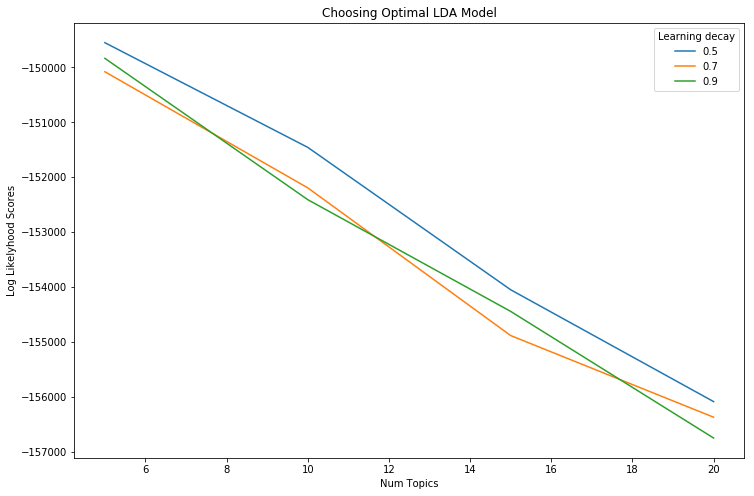

In [592]:
pd_drop_cv_resut = pd_cv_resut.drop(['params'], axis=1)

mean_test_score_5 = pd_drop_cv_resut.loc[pd_drop_cv_resut['param_learning_decay'] == 0.5]['mean_test_score']
mean_test_score_7 = pd_drop_cv_resut.loc[pd_drop_cv_resut['param_learning_decay'] == 0.7]['mean_test_score']
mean_test_score_9 = pd_drop_cv_resut.loc[pd_drop_cv_resut['param_learning_decay'] == 0.9]['mean_test_score']
log_likelyhoods_5 = mean_test_score_5.round().tolist()
log_likelyhoods_7 = mean_test_score_7.round().tolist()
log_likelyhoods_9 = mean_test_score_9.round().tolist()
# Show graph

plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [593]:
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
df_topic_keywords

,abo,absolutely,absorb,accent,access,accessory,acetate,acrylic,action,active,...,xxl,year,yellow,ykk,yoke,zebra,zip,zipper,zirconia,zone
Topic0,1.263415,0.200003,3.000960,6.302939,0.233429,406.847385,6.302555,5.507447,0.202880,0.200397,...,0.200002,2.358723,8.618229,2.345474,0.200187,0.200002,1.540664,0.201010,0.200527,0.200004
Topic1,0.203637,0.200002,0.394607,0.200301,0.201407,242.783893,5.097120,0.201517,0.202096,0.201223,...,0.200002,0.201133,8.723118,3.054332,0.200229,4.199995,28.404892,42.155872,0.200003,3.266844
Topic2,0.200003,0.200002,0.200008,0.201944,0.200002,209.473718,0.200002,0.200618,0.209223,0.200009,...,0.200002,8.040005,6.231496,0.200002,0.200043,0.200001,0.200108,0.200087,0.200323,4.126424
Topic3,2.132940,4.192927,0.201968,3.802094,8.164187,134.413026,0.200136,0.201253,4.185794,258.406682,...,5.199832,0.200002,4.633648,0.200002,8.199364,0.200001,36.653909,36.242730,2.519202,0.203101
Topic4,0.200005,0.207066,2.202457,0.492722,0.200975,0.481978,0.200187,45.889164,0.200008,1.991688,...,0.200162,0.200137,4.793509,0.200189,0.200177,0.200002,0.200427,0.200301,1.879946,0.203626


In [594]:
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20): 
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs)) 
    return topic_keywords
    
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=10)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])] 
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,jewelry,clothing,object,dtype,shoe,costume,accessory,woman,baby,size
Topic 1,shoe,clothing,jewelry,object,dtype,man,safety,work,leather,travel
Topic 2,watch,jewelry,shoe,dtype,object,clothing,wrist,woman,man,resistant
Topic 3,clothing,jewelry,shoe,dtype,object,man,woman,cotton,shirt,lingerie
Topic 4,jewelry,clothing,shoe,dtype,object,woman,necklace,pendant,sock,wide


In [595]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne') 
panel

/Users/justin.shamoun/anaconda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3     -163.904373   14.439604       1        1  26.147029
1      526.413513  213.139359       2        1  22.198298
2      109.718140  328.829956       3        1  20.885524
0        5.620149 -383.360016       4        1  15.593867
4      367.002014 -173.200104       5        1  15.175282, topic_info=     Category         Freq       Term        Total  loglift  logprob
1529  Default  1653.000000      watch  1653.000000  30.0000  30.0000
1574  Default   716.000000      wrist   716.000000  29.0000  29.0000
311   Default   571.000000    costume   571.000000  28.0000  28.0000
891   Default   403.000000   necklace   403.000000  27.0000  27.0000
977   Default   339.000000    pendant   339.000000  26.0000  26.0000
1276  Default   339.000000       sock   339.000000  25.0000  25.0000
878   Default   384.000000   movement   384.000000  24.0000  24.0000
340   Default   374.000000    crystal   374.000000  23.0000  23.0000
1564  Default  2473.000000      woman  2473.000000  22.0000  22.0000
1153  Default   375.000000     safety   375.000000  21.0000  21.0000
1119  Default   452.000000  resistant   452.000000  20.0000  20.0000
718   Default  6268.000000    jewelry  6268.000000  19.0000  19.0000
1215  Default   408.000000      shirt   408.000000  18.0000  18.0000
196   Default   484.000000       case   484.000000  17.0000  17.0000
1531  Default   425.000000      water   425.000000  16.0000  16.0000
1568  Default   385.000000       work   385.000000  15.0000  15.0000
1078  Default   330.000000     quartz   330.000000  14.0000  14.0000
1549  Default   308.000000       wide   308.000000  13.0000  13.0000
779   Default   364.000000   lingerie   364.000000  12.0000  12.0000
83    Default   248.000000       baby   248.000000  11.0000  11.0000
5     Default   971.000000  accessory   971.000000  10.0000  10.0000
1445  Default   300.000000     travel   300.000000   9.0000   9.0000
313   Default   535.000000     cotton   535.000000   8.0000   8.0000
802   Default   272.000000    luggage   272.000000   7.0000   7.0000
588   Default   213.000000       gram   213.000000   6.0000   6.0000
1543  Default   209.000000     weight   209.000000   5.0000   5.0000
1478  Default   246.000000    uniform   246.000000   4.0000   4.0000
858   Default   229.000000    mineral   229.000000   3.0000   3.0000
432   Default   292.000000    earring   292.000000   2.0000   2.0000
912   Default   309.000000    novelty   309.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
684    Topic5     9.468214      inlay    10.249003   1.8063  -7.1891
93     Topic5     9.462428     bangle    10.248619   1.8057  -7.1897
498    Topic5    10.325699     family    11.270550   1.7979  -7.1024
1085   Topic5     8.440177    rainbow     9.219784   1.7972  -7.3040
1549   Topic5   279.668330       wide   308.455764   1.7875  -3.8034
209    Topic5   110.675246      chain   124.899945   1.7646  -4.7304
7      Topic5    47.233404    acrylic    53.234688   1.7659  -5.5819
1386   Topic5    52.000453       tall    61.127288   1.7238  -5.4857
781    Topic5    62.067601       link    77.321716   1.6658  -5.3088
37     Topic5    32.009588   amethyst    39.696011   1.6703  -5.9710
363    Topic5    78.609996     dangle   110.682864   1.5433  -5.0725
655    Topic5    56.575824       hook    79.750396   1.5422  -5.4014
558    Topic5    19.726347     garnet    23.457854   1.7123  -6.4550
415    Topic5    84.601670       drop   127.550225   1.4749  -4.9990
432    Topic5   166.763174    earring   292.592056   1.3233  -4.3204
143    Topic5   128.812992   bracelet   220.637708   1.3473  -4.5786
1284   Topic5    78.478596    spandex   124.415902   1.4247  -5.0742
643    Topic5   162.423827       high   305.666990   1.2532  -4.3468
1564   Topic5   837.570765      woman  2473.528889   0.8026  -2.7065
718    Topic5  1523.473302    je

In [558]:
nlp = spacy.load('en', disable=['parser', 'ner'])
def predict_topic(text, nlp=nlp): 
    global sent_to_words
    global lemmatization
    # Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))
    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    # Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)
    # Step 4: LDA Transform
    topic_probability_scores = best_lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores
# Predict the topic
mytext = ["shoes men"]
topic, prob_scores = predict_topic(text = mytext)
print(topic)
print(prob_scores)

['shoe', 'clothing', 'jewelry', 'object', 'content', 'dtype', 'jewelryb', 'accessory', 'costume', 'man']
[[0.06799709 0.72759305 0.06902085 0.06750195 0.06788706]]


In [570]:
# 'category':,
# 'title': 
# also_view
# also_buy
#   'image': ,
#   'brand': 'bettyhome',
#   'feature': ,
#   'rank': '10,635,107inClothing,ShoesJewelry(',
#   'date': '5 star',
#   'price': '$23.99',
#   'asin': '0206335962',
#   "clothing/women/"
#   'main_cat': 'Clothing, Shoes & Jewelry',
#   'sub_cat': 'Clothing',
#   'gender': 'Women'

# from collections import Counter

from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=3, random_state=100).fit_predict(lda_output)
svd_model = TruncatedSVD(n_components=2)
lda_output_svd = svd_model.fit_transform(lda_output)

x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

print("Component's weights: \n", np.round(svd_model.components_, 2))
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))


Component's weights: 
 [[ 0.1   0.96  0.08  0.23  0.11]
 [ 0.02 -0.24  0.02  0.97  0.09]]
Perc of Variance Explained: 
 [0.2  0.28]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

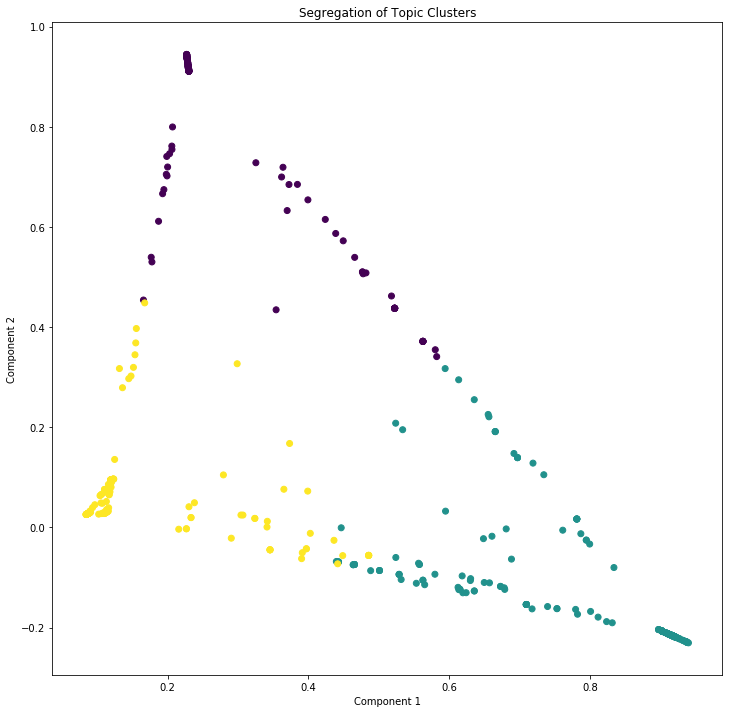

In [571]:
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

In [572]:
from sklearn.metrics.pairwise import euclidean_distances
nlp = spacy.load('en', disable=['parser', 'ner'])

def similar_documents(text, doc_topic_probs, documents = data, nlp=nlp, top_n=5, verbose=False):
    topic, x  = predict_topic(text)
    dists = euclidean_distances(x.reshape(1, -1), doc_topic_probs)[0]
    doc_ids = np.argsort(dists)[:top_n] 
    if verbose:
        print("Topic KeyWords: ", topic)
        print("Topic Prob Scores of text: ", np.round(x, 1))
        print("Most Similar Doc's Probs:  ", np.round(doc_topic_probs[doc_ids]))
        return doc_ids, np.take(documents, doc_ids)

mytext = ['clothing jewelry']
doc_ids, docs = similar_documents(text=mytext, doc_topic_probs=lda_output, documents = data, top_n=1, verbose=True)
print('\n', doc_ids) 
print('\n', docs[0][:500])

Topic KeyWords:  ['shoe', 'clothing', 'jewelry', 'object', 'content', 'dtype', 'jewelryb', 'accessory', 'costume', 'man']
Topic Prob Scores of text:  [[0.1 0.7 0.1 0.1 0.1]]
Most Similar Doc's Probs:   [[0. 1. 0. 0. 0.]]

 [132]

 a clothing, shoes & jewelry b women c accessories d wallets, card cases & money organizers e coin purses & pouches f zip closure g 5 x 3 approx h eco friendly i so small, yet so convenient j jute coin purse k zippered closure l none m none content a clothing, shoes & jewelryb... name: 132, dtype: object


In [72]:
# data = df.content.values.tolist()
# data_words = list(sent_to_words(data))

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def lemmatization(categories):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for cat in categories:
        texts_out.append([c for c in cat])
    return texts_out

data_lemmatized = lemmatization(data)

print(data_lemmatized[:2])

# data_words = list(sent_to_words(dd))
# print(data_words[:1])


[['Clothing, Shoes & Jewelry', 'Costumes & Accessories', 'Kids & Baby', 'Girls', 'Accessories', '3 layers of tulle', '6" long, stretched waist measures 11 1/2" across. Fits up to 7 years.', 'Sequins line the edge of the tulle on the top layer.', 'Great for babys up to about age 7', 'Makes a Great gift for any princess'], ['Clothing, Shoes & Jewelry', 'Luggage & Travel Gear', 'Backpacks', 'Casual Daypacks', 'Polyester Canvas Waterproof', 'Imported', 'Size: Large (H 40 x W 26 x D 20cm)', 'Color: LIGHT GRAY & BLACK | Condition: 100% brand new', '- Made of lightweight, durable and waterproof fabric', '- Roomy main compartment and multiple pockets for functionally', '- a front zip pocket, 2 interior open pockets, bottle pocket on both sides, a zipper at the back. Adjustable double shoulder straps and double top handles']]


In [92]:
# import gensim.corpora as corpora
df = pd.DataFrame(dd)
df.columns = ['productId', 'Categories']

data = df.Categories.values.tolist()

# id2word = corpora.Dictionary(dd)
# for x in list(id2word):
#     print(id2word[x])

In [93]:
id2word = corpora.Dictionary(data)

texts = data

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]]


[[('3 layers of tulle', 1), ('6" long, stretched waist measures 11 1/2" across. Fits up to 7 years.', 1), ('Accessories', 1), ('Clothing, Shoes & Jewelry', 1), ('Costumes & Accessories', 1), ('Girls', 1), ('Great for babys up to about age 7', 1), ('Kids & Baby', 1), ('Makes a Great gift for any princess', 1), ('Sequins line the edge of the tulle on the top layer.', 1)]]

In [94]:

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [95]:
# import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.084*"Unique style beach cover up for your bikinis and swimsuits make you '
  'more beautiful,fashion,sexy and elegant." + 0.084*"Length 30 ", Bust 40~45 '
  '"" + 0.084*"Bohemia style, butterfly printing" + 0.084*"Cover-Ups" + '
  '0.084*"Ice silk cotton,Very soft and comfortable" + 0.084*"Swimsuits & '
  'Cover Ups" + 0.084*"Clothing" + 0.084*"Women" + 0.084*"Imported" + '
  '0.084*"Clothing, Shoes & Jewelry"'),
 (1,
  '0.020*"One size (approx 55-60 cm) adjustable" + 0.020*"Novelty & More" + '
  '0.020*"Women" + 0.020*"Unavailable alkaline detergent, (such as soap, '
  'laundry). With a mild detergent." + 0.020*"Plush,Cotton, Polyester" + '
  '0.020*"Cover-Ups" + 0.020*"Hats & Caps" + 0.020*"Lovely for look,Unisex for '
  'the normal adult" + 0.020*"Length 30 ", Bust 40~45 "" + 0.020*"Novelty"'),
 (2,
  '0.020*"One size (approx 55-60 cm) adjustable" + 0.020*"Novelty & More" + '
  '0.020*"Women" + 0.020*"Unavailable alkaline detergent, (such as soap, '
  'laundry). With a mil

In [98]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.273583865784979

Coherence Score:  0.32364648150084774


In [99]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

vis

TypeError: Object of type 'complex' is not JSON serializable

In [12]:
from pyspark import SparkContext
from pyspark.sql import *
sc = SparkContext(master="local[3]")
sqlContext = SQLContext(sc)

In [ ]:
import datetime

TABLE_NAME = 'data-lake-landing-zone'
FILE_NAME = 'Clothing_Shoes_and_Jewelry_5.json.gz'
PATH = DATA_DIR + TABLE_NAME + FILE_NAME

self.BUCKET_NAME = os.environ["AWS_SECRET_ACCESS_KEY"]
self.DB_NAME = 'standardizationZone'
self.TABLE_NAME = 'Clothing, Shoes & Jewelry'
        
        
rdd = sc.textFile(PATH)

In [ ]:


def toJson(data):
    return json.loads(data)

year = 2019

filename = './{bucket}/{DB}/main_cat={category}/{table}'.format(
    bucket=DL.BUCKET_NAME
    category='Clothing, Shoes & Jewelry', 
    table='Clothing_Shoes_and_Jewelry_5.json.gz', 
    DB='data-lake-landing-zone',
)

def parseDate(d):
    d['unixReviewTime'] = datetime.datetime.utcfromtimestamp(d['unixReviewTime'])
    d['year'] = d['unixReviewTime'].year
    d['month'] = d['unixReviewTime'].month
    d['day'] = d['unixReviewTime'].day
    return d
    
reviewsRDD = rdd.map(lambda a: toJson(a)).map(lambda a: parseDate(a)).filter(lambda x: "year" == year)
reviewsRDD.take(3)

In [28]:
WORKING_DIR =os.path.abspath(os.getcwd())

# os.getcwd()
DATA_DIR = WORKING_DIR + '/../data'

for (root,dirs,files) in os.walk(DATA_DIR):       
    print(root)   
    # # print(dirs)   
    for f in files:
        img_path = os.path.join(root.replace(DATA_DIR,''),f)
        print(img_path)



/Users/justin.shamoun/js/dse260-CapStone-Amazon/src/notebooks/../data
.DS_Store
/Users/justin.shamoun/js/dse260-CapStone-Amazon/src/notebooks/../data/data-lake-standardization-zone
/Users/justin.shamoun/js/dse260-CapStone-Amazon/src/notebooks/../data/data-lake-landing-zone
/data-lake-landing-zone/meta_Clothing_Shoes_and_Jewelry.json.gz


In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

ModuleNotFoundError: No module named 'gensim'

In [ ]:
data = df.content.values.tolist()


{'Costumes & Accessories': {'i': -1, 'r': [-1, -1], 'Kids & Baby': {'i': -1, 'r': [-1, -1]}, 'Girls': {'i': -1, 'r': [-1, -1]}, 'Accessories': {'i': -1, 'r': [-1, -1]}, '3 layers of tulle': {'i': -1, 'r': [-1, -1]}, '6" long, stretched waist measures 11 1/2" across. Fits up to 7 years.': {'i': -1, 'r': [-1, -1]}, 'Sequins line the edge of the tulle on the top layer.': {'i': -1, 'r': [-1, -1]}, 'Great for babys up to about age 7': {'i': -1, 'r': [-1, -1]}, 'Makes a Great gift for any princess': {'i': -1, 'r': [-1, -1]}}, 'Luggage & Travel Gear': {'i': 182804944, 'r': [3, -1], 'Backpacks': {'i': 993837812, 'r': [3, -1]}, 'Casual Daypacks': {'i': -1, 'r': [-1, -1]}, 'Polyester Canvas Waterproof': {'i': -1, 'r': [-1, -1]}, 'Imported': {'i': 909370902, 'r': [3, -1]}, 'Size: Large (H 40 x W 26 x D 20cm)': {'i': -1, 'r': [-1, -1]}, 'Color: LIGHT GRAY & BLACK | Condition: 100% brand new': {'i': -1, 'r': [-1, -1]}, '- Made of lightweight, durable and waterproof fabric': {'i': -1, 'r': [-1, -1]}

In [47]:
CATEGORY_IDX

{'Shoes': {'i': -1,
  'r': [-1, -1],
  'Sneakers and Athletic Shoes': {'i': -1, 'r': [-1, -1]}},
 'Costumes & Accessories': {'i': -1,
  'r': [-1, -1],
  'Kids & Baby': {'i': -1, 'r': [-1, -1]},
  'Girls': {'i': -1, 'r': [-1, -1]},
  'Accessories': {'i': -1, 'r': [-1, -1]},
  '3 layers of tulle': {'i': -1, 'r': [-1, -1]},
  '6" long, stretched waist measures 11 1/2" across. Fits up to 7 years.': {'i': -1,
   'r': [-1, -1]},
  'Sequins line the edge of the tulle on the top layer.': {'i': -1,
   'r': [-1, -1]},
  'Great for babys up to about age 7': {'i': -1, 'r': [-1, -1]},
  'Makes a Great gift for any princess': {'i': -1, 'r': [-1, -1]}},
 'Luggage & Travel Gear': {'i': 182804944,
  'r': [3, -1],
  'Backpacks': {'i': 993837812, 'r': [3, -1]},
  'Casual Daypacks': {'i': -1, 'r': [-1, -1]},
  'Polyester Canvas Waterproof': {'i': -1, 'r': [-1, -1]},
  'Imported': {'i': 909370902, 'r': [3, -1]},
  'Size: Large (H 40 x W 26 x D 20cm)': {'i': -1, 'r': [-1, -1]},
  'Color: LIGHT GRAY & BLACK 

In [ ]:
def get_categories(img_loc) :

    path, file = os.path.split(img_loc)
    path_parts = path.split(os.sep)
    category = path_parts[0]
    subcategory = path_parts[1]

    return {'category': category, 'sub': subcategory}

i= 0
            for category in os.listdir(ROOT_DATA_DIR):
                
                print(category+": "+str(i))
                cid = int(hashlib.sha256(category.encode('utf-8')).hexdigest(), 16) % 10**9
                
                CATEGORY_IDX[category]["i"] = cid
                CATEGORY_IDX[category]["r"][0] = i

                for subcat in os.listdir(ROOT_DATA_DIR+category):

In [42]:
int(hashlib.sha256(category.encode('utf-8')).hexdigest(), 16) % 10**9

AttributeError: 'list' object has no attribute 'encode'

In [43]:
for category in os.listdir(DATA_DIR):
                
    print(category+": "+str(i))
    cid = int(hashlib.sha256(category.encode('utf-8')).hexdigest(), 16) % 10**9
    print(cid)

.DS_Store: 6
125210502
data-lake-standardization-zone: 6
558368851
data-lake-landing-zone: 6
320743661
